## 2022.09.05.(월)
## 결정트리(Decision Tree)
---
- 직관적이고 쉬운 모델 방식
- 스무고개 퀴즈 형식
- 과적합의 발생으로 다른 모델 대비 성능이 좋지 않은 모델
- 단독으로 사용되는 경우보다 여러개의 DT가 모여서 사용됨 ==> 앙상블

In [124]:
# 모듈 로딩
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree # 트리 시각화 함수
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### [1] 데이터 로딩 

In [125]:
# feature name 따로 빼두기 -> 트리 plot 그릴 때 feature명을 주기 위함.
data_bunch = load_breast_cancer()
print(data_bunch.feature_names)
f_names = data_bunch.feature_names

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [126]:
# DataFrame형태로 가져오기 (return_X_y= True, as_frame=True)
data_X, data_y = load_breast_cancer(return_X_y= True, as_frame=True)
#f_names = data.feature
data_X.info() , data_y.info()

# Bunch 타입으로 가져오기 => data, feature...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

(None, None)

In [127]:
# 결측치 확인
data_X.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [128]:
# 배열로 변환
print(type(data_X))
print(type(data_y))

data_X = data_X.to_numpy()
data_y = data_y.to_numpy()

print(type(data_X))
print(type(data_y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


##### [2] 훈련, 테스트 데이터 분리

In [129]:
# stratify = 라벨, 즉 타겟 데이터 지정: 학습~테스트 데이터에도 비율 맞추기

train_input, test_input, train_target, test_target = train_test_split(data_X, data_y,stratify= data_y, random_state = 42 )

In [130]:
# 모델 학습
dtModel = DecisionTreeClassifier()
dtModel.fit(train_input,train_target)

DecisionTreeClassifier()

In [131]:
# Score 비교
print('train데이터: ',dtModel.score(train_input,train_target))
print('test데이터 : ',dtModel.score(test_input,test_target))

train데이터:  1.0
test데이터 :  0.9230769230769231


In [132]:
test_input

array([[1.275e+01, 1.670e+01, 8.251e+01, ..., 8.045e-02, 3.071e-01,
        8.557e-02],
       [1.799e+01, 2.066e+01, 1.178e+02, ..., 1.974e-01, 3.060e-01,
        8.503e-02],
       [1.496e+01, 1.910e+01, 9.703e+01, ..., 1.489e-01, 2.962e-01,
        8.472e-02],
       ...,
       [1.170e+01, 1.911e+01, 7.433e+01, ..., 5.741e-02, 3.487e-01,
        6.958e-02],
       [1.450e+01, 1.089e+01, 9.428e+01, ..., 1.221e-01, 2.889e-01,
        8.006e-02],
       [1.218e+01, 1.784e+01, 7.779e+01, ..., 5.882e-02, 2.227e-01,
        7.376e-02]])

In [133]:
dtModel.predict(test_input)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

##### [3] 트리 시각화

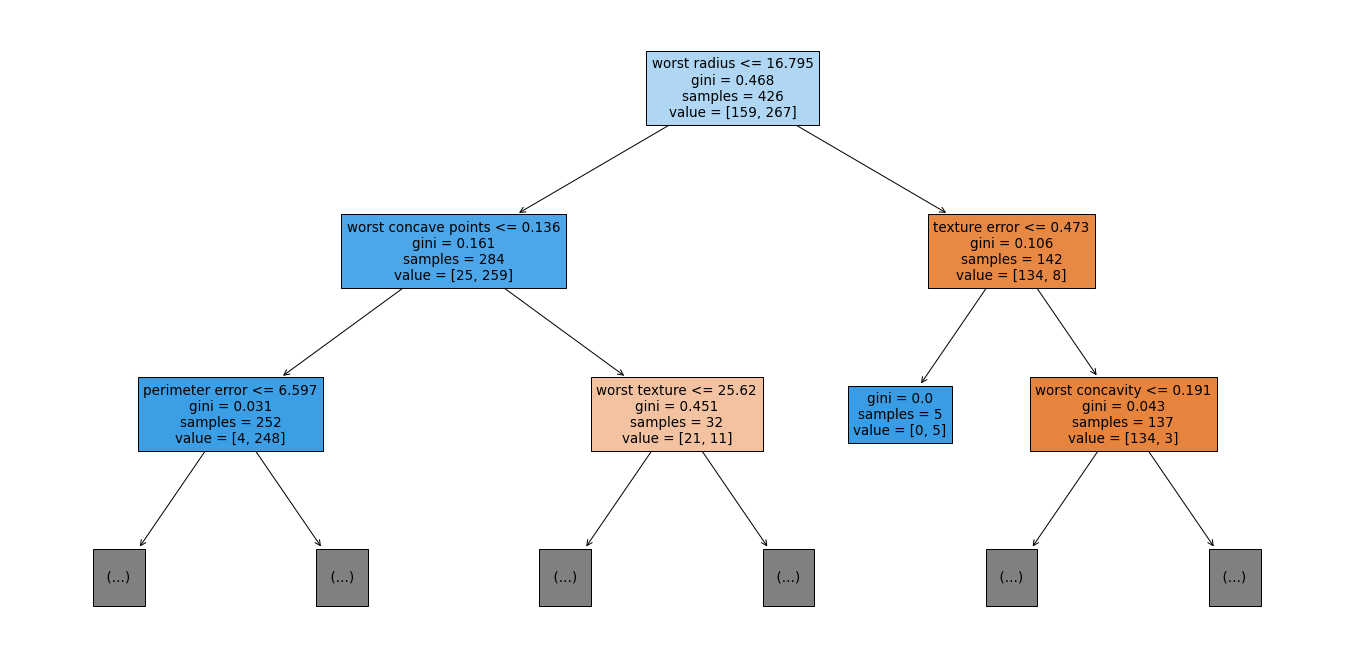

In [134]:
# 트리 모델 시각화 
plt.figure(figsize = (24,12))
plot_tree(dtModel, max_depth=2, filled = True, feature_names=f_names) # 양성: B, 음성: R
plt.show()


## DT에서 속성 중요도 확인 
---
- DT에서 속서들 중에서 속성도 중요도르 감지 가능
- Feature별로 특성들의 중요도 값
- 총합: 1

In [135]:
print(dtModel.feature_importances_)
print('가장 중요한 속성: ', dtModel.feature_importances_.argmax())

[0.         0.01204155 0.00668975 0.         0.         0.
 0.         0.01354675 0.         0.         0.         0.04630969
 0.00975731 0.00983732 0.00238745 0.         0.         0.
 0.         0.         0.69546322 0.04179055 0.         0.
 0.         0.         0.01740312 0.1334007  0.01137258 0.        ]
가장 중요한 속성:  20


In [136]:
# 요소별 상관관계 파악하기
df = pd.DataFrame(data_bunch.data, columns = data_bunch.feature_names)
print(df.corr())

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

In [137]:
# 랜덤포레스트 
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(train_input,train_target)

print("훈련세트 정확도  : {:.3f}".format(forest.score(train_input,train_target)))
print("테스트세트 정확도: {:.3f}".format(forest.score(test_input,test_target)))


훈련세트 정확도  : 1.000
테스트세트 정확도: 0.958


In [138]:
### RandomForest 학습 모델


## 앙상블(ENSEMBLE)
---
1. 보팅
- 동일 훈련데이털로 여러 알고리즘의 여러 모델 병렬 학습
    - 직접 투표 방식: 예측값들의 다수로 결정
    - 간접 투표 방식: 확률값들의 평균값으로 결정

2. 배깅
- 중복 허용 랜덤 샘플링으로 학습 데이터 부족 해결
- 중복 샘플링 데이터와 동일 알고리즘의 여러 모델 병렬 학습

3. 페이스팅
- 중복 불허 샘플링 데이터와 동일 알고리즘 여러 모델 병렬 학습

4. 랜덤포레스트
- 결정 트리 여러 개를 랜덤으로 만들어 예측값들을 사용
    - 분류 : RandomForestClassifier
    - 회귀 : RandomForestRegressor


## RandomForest 학습 모델
---
- 100개 DecisionTree 모델
- 중복허용된 랜덤샘플 데이터 + DecisionTree 모델

In [139]:
# 모듈 로딩
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# 모델 생성
model_RF = RandomForestClassifier()
model_RF.fit(train_input, train_target)

RandomForestClassifier()

In [140]:
# 모델 학습 후 속성
print(f'classes_ : {model_RF.classes_}')
print(f'base_estimator_ : {model_RF.base_estimator}') # 가장 좋은 분류기 선정

# 가장 좋은 분류기 저장
model_best = model_RF.base_estimator_
model_best.fit(train_input, train_target)

classes_ : [0 1]
base_estimator_ : DecisionTreeClassifier()


DecisionTreeClassifier()

In [141]:
# 평가
print("RF_train score : ", model_RF.score(train_input,train_target))
print("RF_test score  : ", model_RF.score(test_input,test_target))

# 평가
print("best_train score : ", model_best.score(train_input,train_target))
print("best_test score  : ", model_best.score(test_input,test_target))

RF_train score :  1.0
RF_test score  :  0.958041958041958
best_train score :  1.0
best_test score  :  0.9370629370629371


In [142]:
# oob_score: 중복허용랜던샘플에 포함되지 않은 데이터 => 검증용으로 사용
model_RF_oob = RandomForestClassifier(oob_score = False)
model_RF_oob.fit(train_input,train_target)
print('oob_RF_model: ', model_RF_oob.score(test_input,test_target))

oob_RF_model:  0.951048951048951


In [143]:
model_RF.n_features_

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


30

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


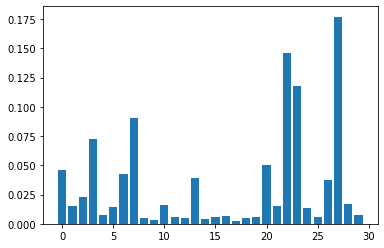

In [154]:
plt.bar(x = np.arange(model_RF.n_features_), height=model_RF.feature_importances_)
plt.show()

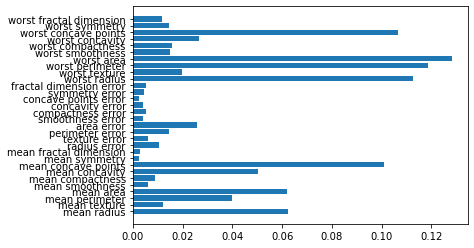

In [ ]:
plt.barh(y=f_names,width=model_RF.feature_importances_)
plt.show()

## 실습: select_model
---
Sklearn 모델 추천 함수 활용
- sklearn.utils 모듈의 all_estimators(type_filter)
    * type_filter 파라미터: 'classifier','regressor' 지정
    * 반환: 해당 타입의 모델 리스트 => 모델이름, 모델객체

In [155]:
# 모듈 로딩
from sklearn.utils import all_estimators
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

##### [1] 데이터 로딩 및 확인

In [166]:
# Bunch 데이터 타입 => dict와 유사한 형태
data =load_iris()

In [167]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [168]:
# data, target => numpy 타입
# target_names => 라벨 => setosa, versicolor...
# feature_names => 컬럼명
input_data = data['data']
input_target = data['target']

##### [2] 학습 데이터 분리

In [189]:
# 학습 - 테스트 데이터셋
train_input, test_input, train_target, test_target =train_test_split(input_data, input_target, test_size = 0.2, random_state = 42)

In [197]:
# 학습 - 검증용 데이터셋
train_input, val_input, train_target, val_target =train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

##### [3] 학습
- 학습방법 선정 => 분류/회귀
    - 분류 => knn, logisticRegression, DecisionTreeClassifier, SGDClassifier,SVC...
    - 분류모델 적용 후결과 => all_estimators()

In [190]:
# 필터 타입에 해당하는 sklearn에 존재하는 모든 모델 이름과 객체 리스트로 반환
models = all_estimators(type_filter = 'classifier')
models

[('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('CalibratedClassifierCV', sklearn.calibration.CalibratedClassifierCV),
 ('CategoricalNB', sklearn.naive_bayes.CategoricalNB),
 ('ClassifierChain', sklearn.multioutput.ClassifierChain),
 ('ComplementNB', sklearn.naive_bayes.ComplementNB),
 ('DecisionTreeClassifier', sklearn.tree._classes.DecisionTreeClassifier),
 ('DummyClassifier', sklearn.dummy.DummyClassifier),
 ('ExtraTreeClassifier', sklearn.tree._classes.ExtraTreeClassifier),
 ('ExtraTreesClassifier', sklearn.ensemble._forest.ExtraTreesClassifier),
 ('GaussianNB', sklearn.naive_bayes.GaussianNB),
 ('GaussianProcessClassifier',
  sklearn.gaussian_process._gpc.GaussianProcessClassifier),
 ('GradientBoostingClassifier',
  sklearn.ensemble._gb.GradientBoostingClassifier),
 ('HistGradientBoostingClassifier',
  sklearn.ensemble._hist_gradi

In [193]:
# 각 모델들 훈련시키고 정확도 추출
scores = []
for name, model in models:
    try:
        # 모델 객체 생성
        md = model()
        # 학습
        md.fit(train_input, train_target)
        # 평가
        result = md.score(test_input, test_target)
    
        scores.append((name, result))
    except:
        pass

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

In [194]:
# 각 분류기 모듈명과 score
scores

[('AdaBoostClassifier', 1.0),
 ('BaggingClassifier', 1.0),
 ('BernoulliNB', 0.3),
 ('CalibratedClassifierCV', 0.9666666666666667),
 ('CategoricalNB', 0.9666666666666667),
 ('ComplementNB', 0.7),
 ('DecisionTreeClassifier', 1.0),
 ('DummyClassifier', 0.3),
 ('ExtraTreeClassifier', 0.9),
 ('ExtraTreesClassifier', 1.0),
 ('GaussianNB', 1.0),
 ('GaussianProcessClassifier', 1.0),
 ('GradientBoostingClassifier', 1.0),
 ('HistGradientBoostingClassifier', 1.0),
 ('KNeighborsClassifier', 1.0),
 ('LabelPropagation', 1.0),
 ('LabelSpreading', 1.0),
 ('LinearDiscriminantAnalysis', 1.0),
 ('LinearSVC', 1.0),
 ('LogisticRegression', 1.0),
 ('LogisticRegressionCV', 1.0),
 ('MLPClassifier', 1.0),
 ('MultinomialNB', 0.9),
 ('NearestCentroid', 0.9666666666666667),
 ('NuSVC', 1.0),
 ('PassiveAggressiveClassifier', 0.8),
 ('Perceptron', 0.8),
 ('QuadraticDiscriminantAnalysis', 0.9666666666666667),
 ('RadiusNeighborsClassifier', 1.0),
 ('RandomForestClassifier', 1.0),
 ('RidgeClassifier', 0.9),
 ('RidgeCla

## K-Fold Cross Validation 
---
- 가장 일반적으로 사용되는 교차 검증 방법. 
- 보통 회귀 모델에 사용, 데이터가 독립적이고 동일한 분포 가진 경우 사용

- 훈련 데이터가 줄어드는 문제 및 데이터가 충분하지 않은 문제 해결
- 테스트 데이터에 과대적합(Overfitting) 문제 해결 
- 훈련 데이터를 동일 크기로 여러 조각 나눈 후 데이터를교차시켜훈련/검증 데이터로 활용

##### [장점] 
- 모든 데이터셋을 훈련과 평가에 활용 가능=> 정확도 ▲  
- 데이터부족 과소적합 방지
- 평가용 데이터 편중 ▼ 
- 평가 결과에 일반화된 모델 생성

##### [단점] 
- 훈련과 평가에 많은 시간 소요